Data Preprocessing:

    Handle any missing values.
    Encode categorical variables.
    Scale the features if necessary.

Exploratory Data Analysis (EDA):

    Visualize relationships between features and the target variable.
    Check feature correlations.

Model Development:

    Split the data into training and testing sets.
    Train a regression model (e.g., Linear Regression, Random Forest).
    Evaluate model performance.

Model Evaluation:

    Use metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared.

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")



In [122]:
housing = pd.read_csv(r"\\wsl.localhost\Ubuntu-22.04\home\tomcat\Portfolio Machine learning\Feature Engineering\housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [124]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [126]:
missing_values = housing.isnull().sum()
missing_values

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

There are 207 missing values in the total_bedrooms column.

In [129]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Imputation: Filling the missing values with the median or mean.

In [132]:
# Impute missing values in 'total_bedrooms' with the median
median_total_bedrooms = housing['total_bedrooms'].median()
housing['total_bedrooms'].fillna(median_total_bedrooms, inplace=True)

# Verify if there are any missing values left
missing_values_after_imputation = housing.isnull().sum()

# Display the result
missing_values_after_imputation


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

### Encode the categorical variable and Data Scaling

In [135]:
# Encode the categorical variable 'ocean_proximity' using one-hot encoding
housing_encoded = pd.get_dummies(housing, columns=['ocean_proximity'], drop_first=True)

# Display the first few rows of the encoded dataset
housing_encoded.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,False,False,True,False
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,False,False,True,False
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,False,False,True,False
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,False,False,True,False
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,False,False,True,False


The categorical variable ocean_proximity has been successfully encoded into multiple binary columns

# Exploratory Data Analysis (EDA)

Descriptive Statistics: Summarize the data.

Correlation Analysis: Check correlations between features and the target variable.

    Visualizations:

    Distribution of the target variable.
    Relationships between key features and the target variable.
    Distribution of categorical features.

### Descriptive statistics and correlation analysis

In [141]:
# Descriptive statistics for the dataset
descriptive_stats = housing_encoded.describe()

# Correlation analysis between features and the target variable
correlation_matrix = housing_encoded.corr()

# Display descriptive statistics and correlation with the target variable
descriptive_stats, correlation_matrix['median_house_value'].sort_values(ascending=False)


(          longitude      latitude  housing_median_age   total_rooms  \
 count  20640.000000  20640.000000        20640.000000  20640.000000   
 mean    -119.569704     35.631861           28.639486   2635.763081   
 std        2.003532      2.135952           12.585558   2181.615252   
 min     -124.350000     32.540000            1.000000      2.000000   
 25%     -121.800000     33.930000           18.000000   1447.750000   
 50%     -118.490000     34.260000           29.000000   2127.000000   
 75%     -118.010000     37.710000           37.000000   3148.000000   
 max     -114.310000     41.950000           52.000000  39320.000000   
 
        total_bedrooms    population    households  median_income  \
 count    20640.000000  20640.000000  20640.000000   20640.000000   
 mean       536.838857   1425.476744    499.539680       3.870671   
 std        419.391878   1132.462122    382.329753       1.899822   
 min          1.000000      3.000000      1.000000       0.499900   
 25% 

Descriptive Statistics

The summary of the dataset reveals the following key points:

    The median_house_value ranges from 14,999 to 500,001 with a mean of approximately 206,856.
    
    The feature median_income shows a strong relationship with median_house_value, with a mean of 3.87 and a maximum of 15.

Correlation Analysis

The correlation analysis shows:

    median_income has the highest positive correlation (0.688) with median_house_value.
    
    Categorical features like ocean_proximity_NEAR BAY and ocean_proximity_NEAR OCEAN have moderate positive correlations with the target.
    
    ocean_proximity_INLAND has a negative correlation (-0.485) with the target.

### Visualization of median_house_value distribution

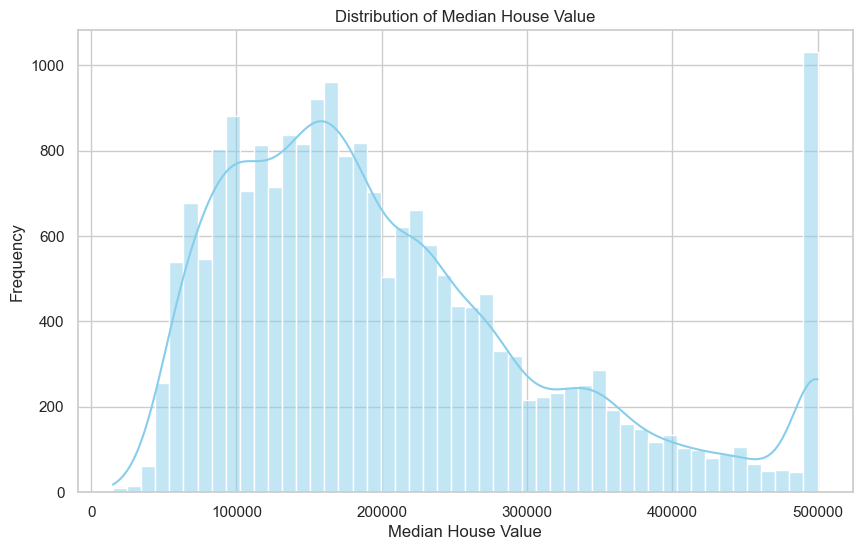

In [145]:
# Set the aesthetic style for the plots
sns.set(style="whitegrid")

# Plot the distribution of median house value
plt.figure(figsize=(10, 6))
sns.histplot(housing['median_house_value'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()


The distribution of the median house value is right-skewed, with a significant number of houses at the upper limit of 500,001, indicating a possible cap in the data. This could affect the model's predictions and interpretation.

### Relationship between median_income and median_house_value

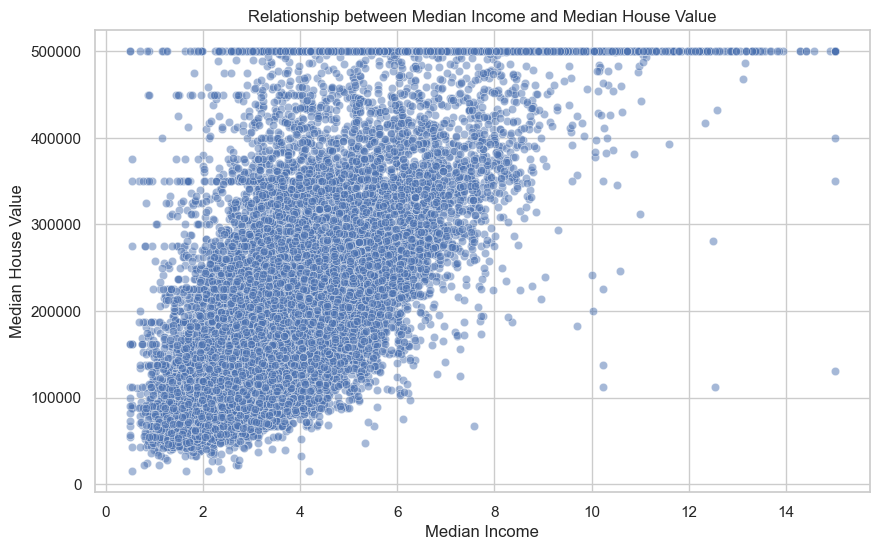

In [149]:
# Plot the relationship between median_income and median_house_value
plt.figure(figsize=(10, 6))
sns.scatterplot(x=housing['median_income'], y=housing['median_house_value'], alpha=0.5)
plt.title('Relationship between Median Income and Median House Value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()


The scatter plot shows a strong positive relationship between median_income and median_house_value. However, there are clear horizontal lines at the upper end, indicating a cap at 500,001

## Let address skweness in Median House Value.Capped Values at 500,001 and Outliers in Ocean Proximity

Skewness in Median House Value:

    Apply a log transformation to the median_house_value to reduce skewness.

Capped Values at 500,001:

    Investigate the capped values and consider adjusting them or removing them if necessary.

Outliers in Ocean Proximity:

    Identify and handle outliers based on the distribution shown in the boxplot.

### SKEWNESS

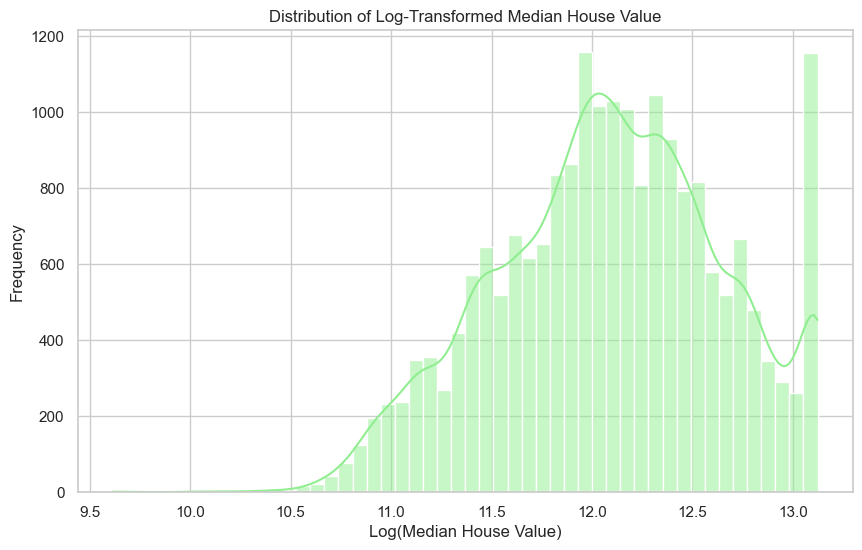

In [155]:
# Apply log transformation to median_house_value to reduce skewness
housing['median_house_value_log'] = housing['median_house_value'].apply(lambda x: x if x == 500001 else x + 1).apply(np.log)

# Plot the distribution of the log-transformed median house value
plt.figure(figsize=(10, 6))
sns.histplot(housing['median_house_value_log'], bins=50, kde=True, color='lightgreen')
plt.title('Distribution of Log-Transformed Median House Value')
plt.xlabel('Log(Median House Value)')
plt.ylabel('Frequency')
plt.show()


The log transformation has successfully reduced the skewness in the distribution of the median house value, resulting in a more normalized distribution.

### Capped Values at 500,001

In [159]:
# Count the number of capped values at 500001 in the original median_house_value
capped_values_count = housing[housing['median_house_value'] == 500001].shape[0]

# Calculate the percentage of capped values
total_values = housing.shape[0]
percentage_capped = (capped_values_count / total_values) * 100

# Display the count and percentage of capped values
capped_values_count, percentage_capped


(965, 4.675387596899225)

There are 965 capped values at 500,001, which account for approximately 4.68% of the dataset. This is a significant portion, and removing them might lead to loss of information.

#### Target Adjustment by scaling them slightly down

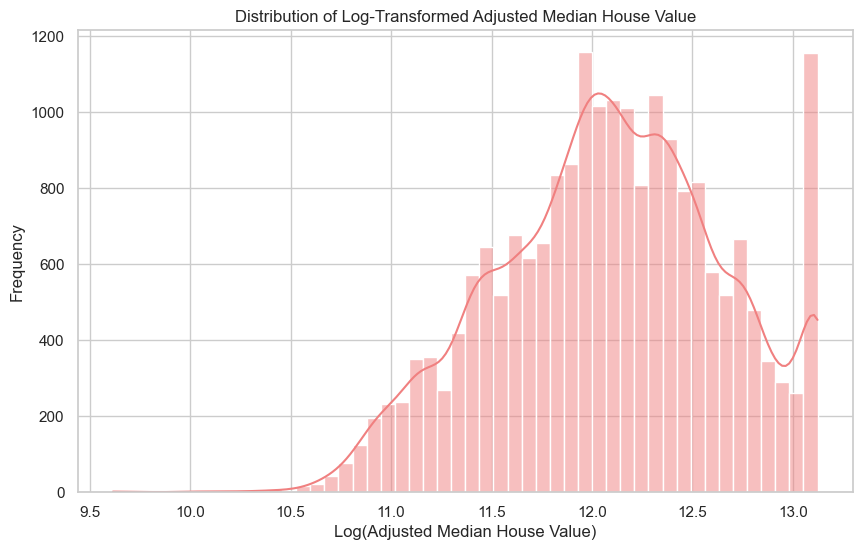

In [163]:
# Adjust the capped values slightly below 500001
housing['median_house_value_adjusted'] = housing['median_house_value'].apply(lambda x: 499999 if x == 500001 else x)

# Apply log transformation to the adjusted values
housing['median_house_value_log_adjusted'] = housing['median_house_value_adjusted'].apply(lambda x: np.log(x + 1))

# Plot the distribution of the log-transformed adjusted median house value
plt.figure(figsize=(10, 6))
sns.histplot(housing['median_house_value_log_adjusted'], bins=50, kde=True, color='lightcoral')
plt.title('Distribution of Log-Transformed Adjusted Median House Value')
plt.xlabel('Log(Adjusted Median House Value)')
plt.ylabel('Frequency')
plt.show()


The log-transformed distribution of the adjusted median house values now shows a smoother distribution without the sharp peak caused by the cap. This should provide a more reliable basis for modeling.

## Outliers in Ocean Proximity

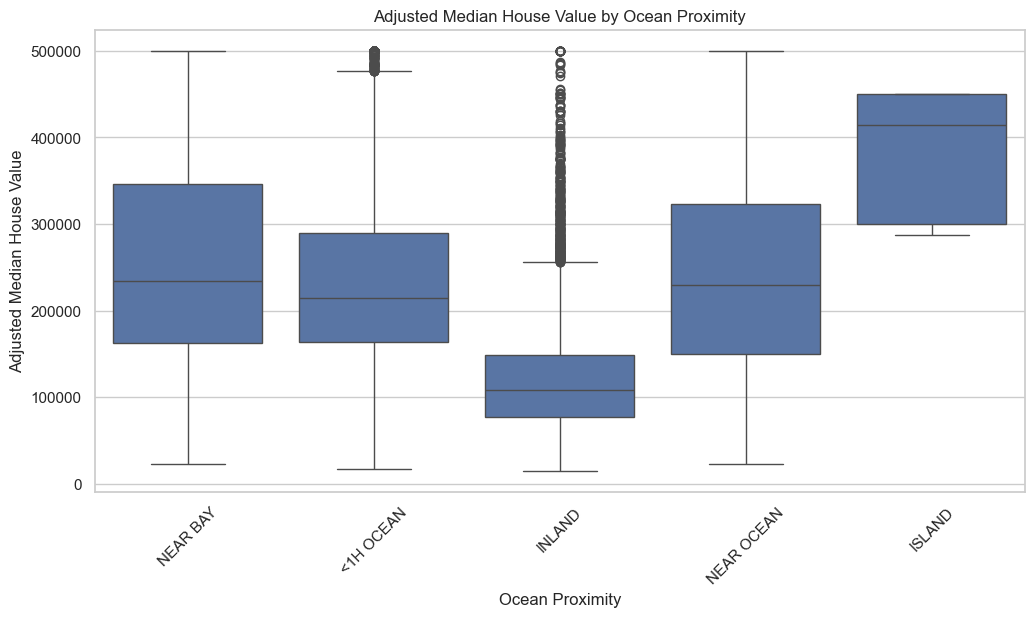

In [167]:
# Boxplot to visualize outliers in ocean proximity categories
plt.figure(figsize=(12, 6))
sns.boxplot(x=housing['ocean_proximity'], y=housing['median_house_value_adjusted'])
plt.title('Adjusted Median House Value by Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Adjusted Median House Value')
plt.xticks(rotation=45)
plt.show()


The boxplot reveals that:

Properties closer to the ocean (like NEAR OCEAN and NEAR BAY) have generally higher median house values.
Inland properties (INLAND) have significantly lower median house values on average.
The ISLAND category has the widest range of house values, though it's less frequent in the dataset.

This indicates that proximity to the ocean is an influential factor in house pricing


### Let remove the Outliers

In [171]:
# Function to remove outliers based on IQR for each ocean_proximity category
def remove_outliers_iqr(df, column, category_column):
    new_df = pd.DataFrame()
    for category in df[category_column].unique():
        # Subset for each category
        subset = df[df[category_column] == category]
        
        # Calculate IQR
        Q1 = subset[column].quantile(0.25)
        Q3 = subset[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filter out the outliers
        filtered_subset = subset[(subset[column] >= lower_bound) & (subset[column] <= upper_bound)]
        
        # Append to the new DataFrame
        new_df = pd.concat([new_df, filtered_subset], axis=0)
        
    return new_df

# Apply the function to remove outliers based on IQR for each ocean proximity category
housing_cleaned = remove_outliers_iqr(housing, 'median_house_value_adjusted', 'ocean_proximity')

# Check the number of rows before and after removing outliers
original_rows = housing.shape[0]
cleaned_rows = housing_cleaned.shape[0]

original_rows, cleaned_rows


(20640, 19706)

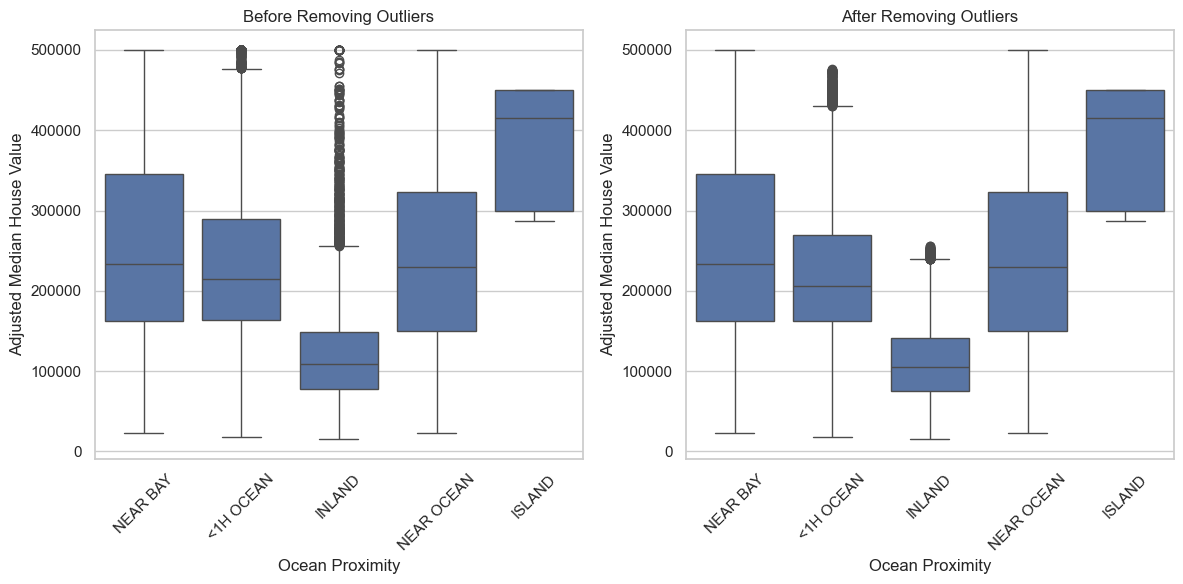

In [173]:
# Plot the boxplot before and after removing outliers

# Before removing outliers
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=housing['ocean_proximity'], y=housing['median_house_value_adjusted'])
plt.title('Before Removing Outliers')
plt.xlabel('Ocean Proximity')
plt.ylabel('Adjusted Median House Value')
plt.xticks(rotation=45)

# After removing outliers
plt.subplot(1, 2, 2)
sns.boxplot(x=housing_cleaned['ocean_proximity'], y=housing_cleaned['median_house_value_adjusted'])
plt.title('After Removing Outliers')
plt.xlabel('Ocean Proximity')
plt.ylabel('Adjusted Median House Value')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


The boxplots show a clear difference before and after removing outliers:

    Before Removing Outliers: There were several extreme values, especially in categories like ISLAND and NEAR OCEAN.
    
    After Removing Outliers: The range of values is more constrained, indicating that the extreme values have been effectively removed, leading to a cleaner dataset.

### Removing the remaining outliers

In [177]:
# Determine the 1st and 99th percentile limits for each category of 'ocean_proximity'
percentile_limits = housing_cleaned.groupby('ocean_proximity')['median_house_value_adjusted'].quantile([0.01, 0.99]).unstack()

# Function to cap values based on percentile limits
def cap_values(row):
    category = row['ocean_proximity']
    value = row['median_house_value_adjusted']
    lower_limit = percentile_limits.loc[category, 0.01]
    upper_limit = percentile_limits.loc[category, 0.99]
    
    if value < lower_limit:
        return lower_limit
    elif value > upper_limit:
        return upper_limit
    else:
        return value

# Apply the capping function to the data
housing_capped = housing_cleaned.copy()
housing_capped['median_house_value_adjusted'] = housing_cleaned.apply(cap_values, axis=1)

# Display the first few rows to show the capped values
print(housing_capped[['ocean_proximity', 'median_house_value_adjusted']].head())


  ocean_proximity  median_house_value_adjusted
0        NEAR BAY                     452600.0
1        NEAR BAY                     358500.0
2        NEAR BAY                     352100.0
3        NEAR BAY                     341300.0
4        NEAR BAY                     342200.0


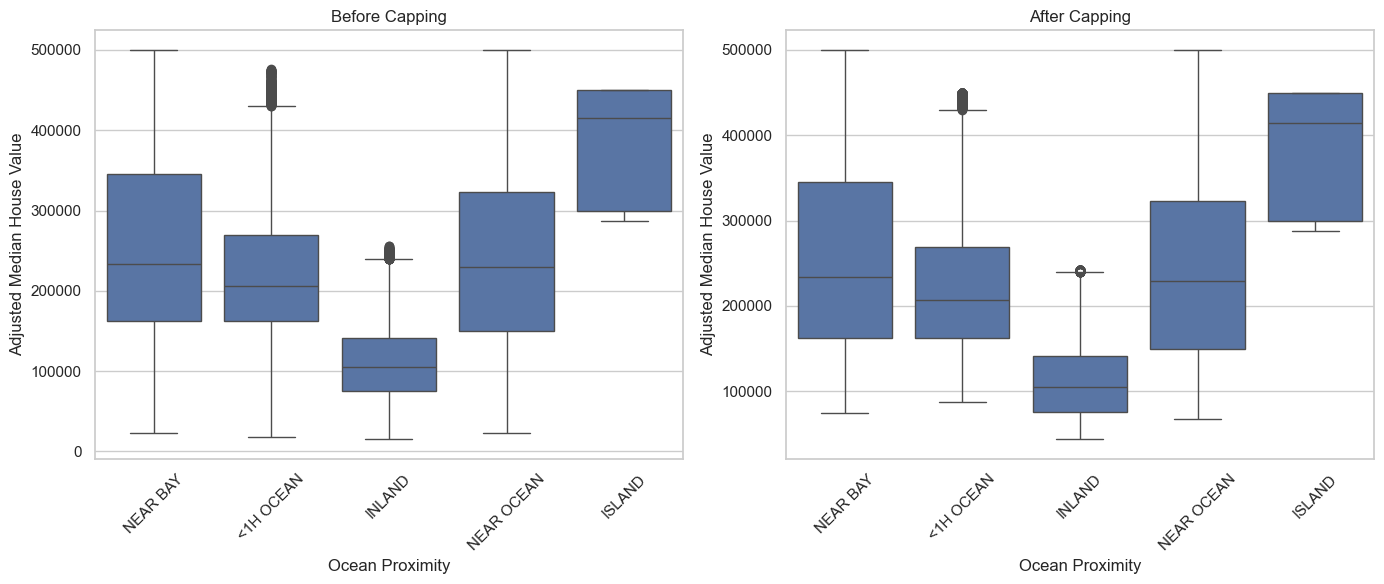

In [178]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Plot boxplots before and after capping
plt.figure(figsize=(14, 6))

# Before capping
plt.subplot(1, 2, 1)
sns.boxplot(x=housing_cleaned['ocean_proximity'], y=housing_cleaned['median_house_value_adjusted'])
plt.title('Before Capping')
plt.xlabel('Ocean Proximity')
plt.ylabel('Adjusted Median House Value')
plt.xticks(rotation=45)

# After capping
plt.subplot(1, 2, 2)
sns.boxplot(x=housing_capped['ocean_proximity'], y=housing_capped['median_house_value_adjusted'])
plt.title('After Capping')
plt.xlabel('Ocean Proximity')
plt.ylabel('Adjusted Median House Value')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


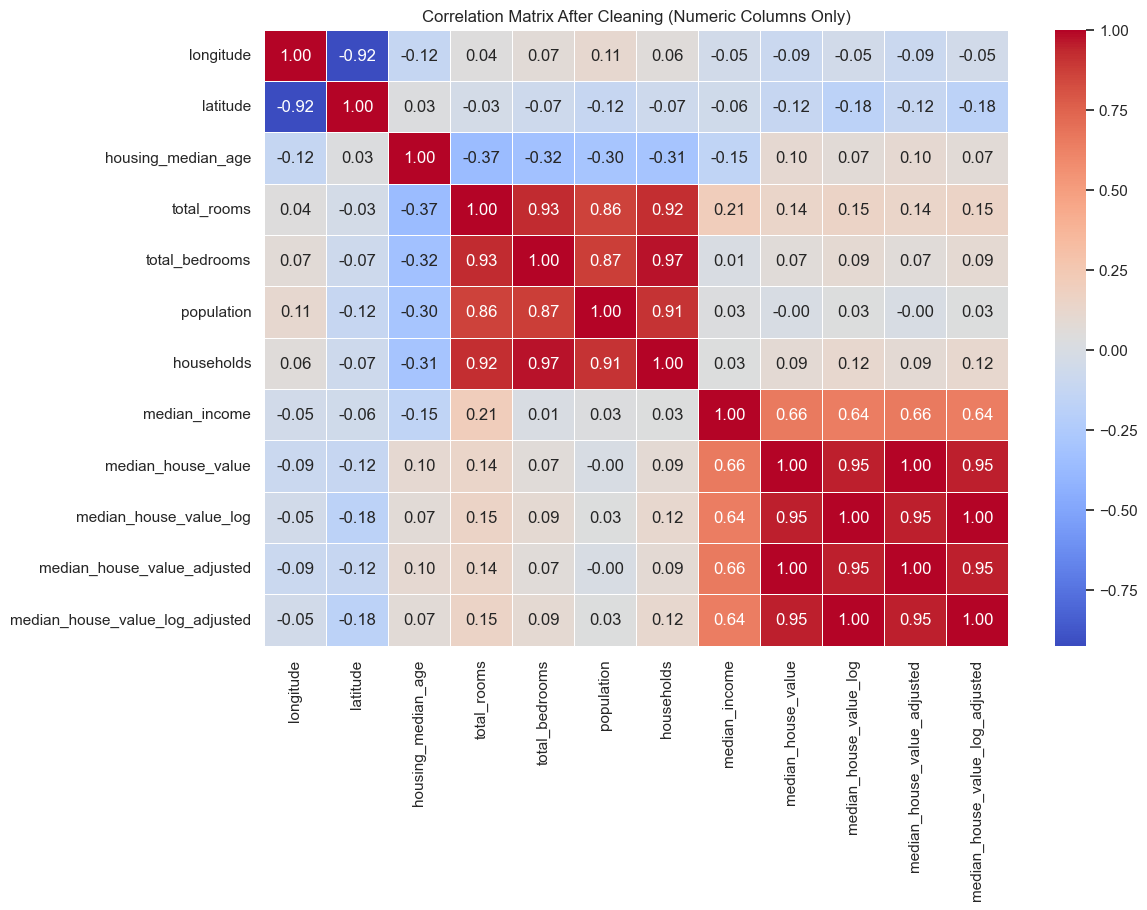

In [180]:
# Select only numeric columns for the correlation matrix
numeric_columns = housing_cleaned.select_dtypes(include=[np.number])

# Compute the correlation matrix with numeric columns only
correlation_matrix_cleaned_numeric = numeric_columns.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_cleaned_numeric, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix After Cleaning (Numeric Columns Only)')
plt.show()



# Feature importance and selection

To explore feature importance and selection, we can follow these steps:

    Model-based Feature Importance:
        Use models like Random Forest or Gradient Boosting to evaluate the importance of each feature based on its contribution to the prediction.

    Recursive Feature Elimination (RFE):
        Iteratively build models and remove the least important features to select the best subset.

    Correlation Analysis:
        Identify and remove highly correlated features that provide redundant information.

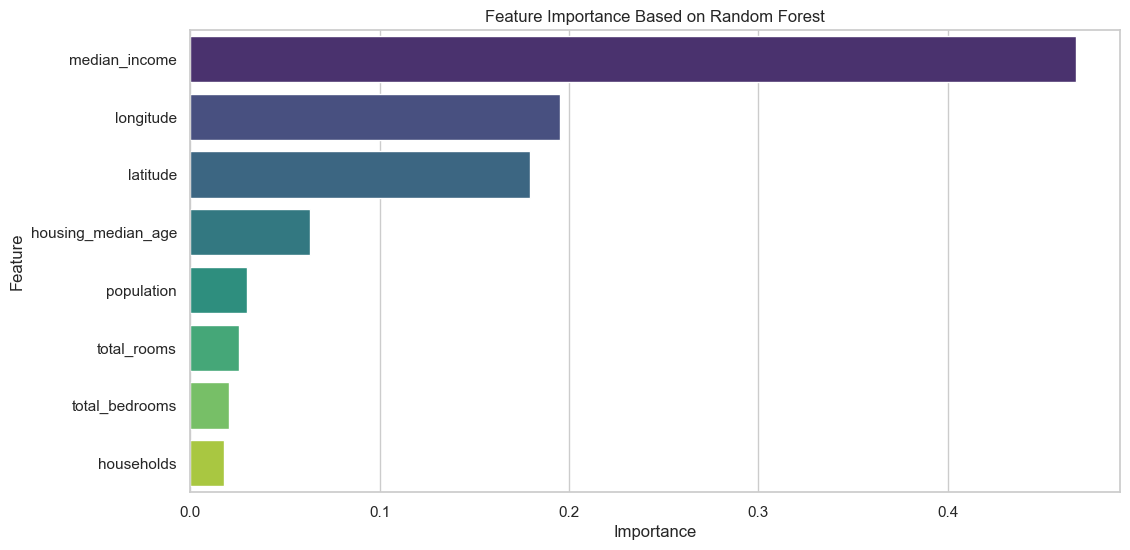

,Feature,Importance
7,median_income,0.467651
0,longitude,0.195347
1,latitude,0.179573
2,housing_median_age,0.063062
5,population,0.030032
3,total_rooms,0.026007
4,total_bedrooms,0.020431
6,households,0.017897


In [186]:
# dropping non-numeric columns and the target variable
features = numeric_columns.drop(columns=['median_house_value', 'median_house_value_log', 
                                         'median_house_value_adjusted', 'median_house_value_log_adjusted'])
target = numeric_columns['median_house_value_adjusted']

# Train a Random Forest Regressor to evaluate feature importance
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(features, target)

# Extract feature importances
feature_importances = model_rf.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': features.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance Based on Random Forest')
plt.show()

# Display the feature importance values
feature_importance_df


The feature importance analysis using the Random Forest model shows the following:

    Top Features:
        median_income is by far the most important feature, contributing nearly half of the importance.
        longitude and latitude are also significant predictors, indicating that location plays a crucial role in determining house prices.

    Less Important Features:
        Features like housing_median_age, population, total_rooms, total_bedrooms, and households have relatively lower importance.

## Feature Selection

Select Top Features: Based on the feature importance from the Random Forest model, we'll select the top features that contribute the most to the model's prediction.

Set a Threshold: Choose a threshold to decide which features to include (e.g., features contributing more than a certain percentage).

In [191]:
# Set a threshold for feature selection (e.g., include features with importance > 0.05)
threshold = 0.05
selected_features = feature_importance_df[feature_importance_df['Importance'] > threshold]['Feature'].tolist()

# Prepare a new dataset with the selected features
features_selected = features[selected_features]

# Display the selected features and their importances
selected_features_df = feature_importance_df[feature_importance_df['Feature'].isin(selected_features)]

# Show the selected features
selected_features_df


,Feature,Importance
7,median_income,0.467651
0,longitude,0.195347
1,latitude,0.179573
2,housing_median_age,0.063062


The selected features based on the importance threshold are:

    median_income
    longitude
    latitude
    housing_median_age

These are the features we will use for further model building or analysis.

### Correlation among selected features

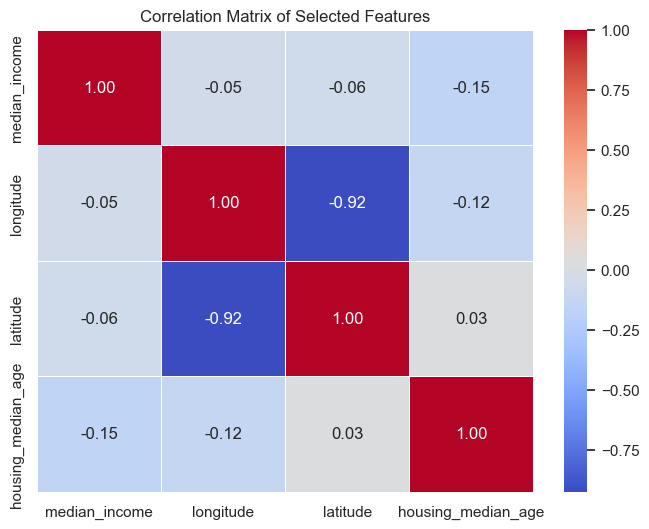

,median_income,longitude,latitude,housing_median_age
median_income,1.000000,-0.045051,-0.057257,-0.150380
longitude,-0.045051,1.000000,-0.924027,-0.123727
latitude,-0.057257,-0.924027,1.000000,0.025392
housing_median_age,-0.150380,-0.123727,0.025392,1.000000


In [195]:
# Compute correlation matrix for the selected features
correlation_selected_features = features_selected.corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_selected_features, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Selected Features')
plt.show()

# Display the correlation matrix
correlation_selected_features


The correlation matrix for the selected features reveals the following insights:

    High Negative Correlation:
        longitude and latitude have a strong negative correlation of -0.92, which is expected due to their geographic relationship. This indicates that they may provide overlapping information.

    Moderate Negative Correlation:
        median_income has a moderate negative correlation with housing_median_age (-0.15). This suggests that areas with newer houses tend to have higher incomes.

    Weak Correlation:
        median_income has weak correlations with both longitude and latitude, suggesting that income is somewhat independent of geographical location within this dataset.

## Principal Component Analysis (PCA) for dimensionality reduction

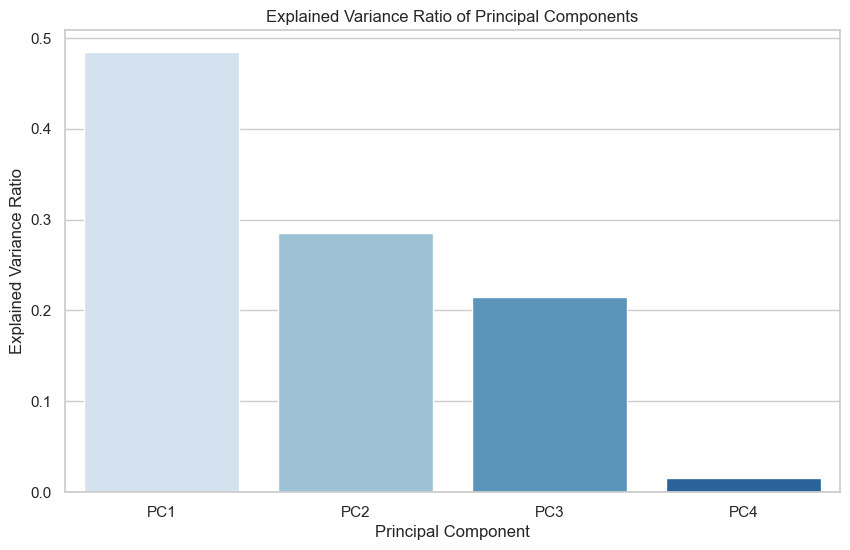

,Principal Component,Explained Variance Ratio,Cumulative Explained Variance
0,PC1,0.484158,0.484158
1,PC2,0.285561,0.769719
2,PC3,0.214498,0.984217
3,PC4,0.015783,1.000000


In [199]:
# Standardize the selected features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_selected)

# Apply PCA
pca = PCA()
principal_components = pca.fit_transform(features_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Create a DataFrame for explained variance ratio
pca_explained_variance_df = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(explained_variance_ratio))],
    'Explained Variance Ratio': explained_variance_ratio
})

# Cumulative explained variance
pca_explained_variance_df['Cumulative Explained Variance'] = pca_explained_variance_df['Explained Variance Ratio'].cumsum()

# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
sns.barplot(x='Principal Component', y='Explained Variance Ratio', data=pca_explained_variance_df, palette='Blues')
plt.title('Explained Variance Ratio of Principal Components')
plt.show()

# Create a DataFrame for the explained variance and cumulative explained variance
pca_variance_df = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(explained_variance_ratio))],
    'Explained Variance Ratio': explained_variance_ratio,
    'Cumulative Explained Variance': explained_variance_ratio.cumsum()
})


# Show the DataFrame
pca_variance_df


The PCA analysis shows the following results:

    Principal Component 1 (PC1):
        Explains approximately 48.4% of the variance in the data.

    Principal Component 2 (PC2):
        Explains an additional 28.6% of the variance, bringing the cumulative variance explained to around 77%.

    Principal Component 3 (PC3):
        Adds another 21.4%, making the cumulative variance explained 98.4%.

    Principal Component 4 (PC4):
        Contributes only 1.6% to the total variance.

Insights:

    The first two components (PC1 and PC2) capture about 77% of the variance, indicating that they contain most of the information from the original features.
    We can consider using only the first two or three components for further analysis or modeling to reduce dimensionality while retaining most of the information.

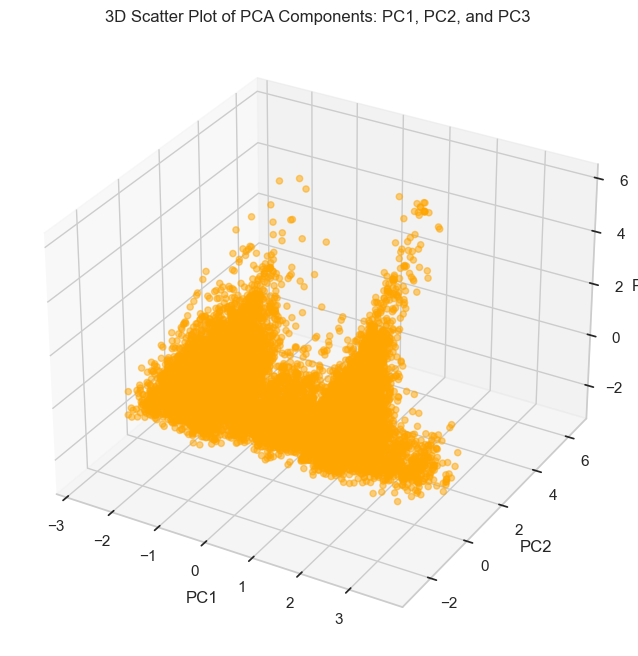

In [202]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming the original data features are available in `features_selected`
# Step 1: Standardize the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_selected)

# Step 2: Apply PCA again if needed
pca = PCA()
principal_components = pca.fit_transform(features_scaled)

# Step 3: Create a DataFrame for the PCA components
pca_components_df = pd.DataFrame(
    data=principal_components,
    columns=[f'PC{i+1}' for i in range(principal_components.shape[1])]
)

# Now create the 3D scatter plot again
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of PC1, PC2, and PC3
ax.scatter(pca_components_df['PC1'], pca_components_df['PC2'], pca_components_df['PC3'], alpha=0.5, c='orange')

# Labels and title
ax.set_title('3D Scatter Plot of PCA Components: PC1, PC2, and PC3')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.show()


# Modeling

### Linear regression

In [206]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# We'll use the first 3 principal components for simplicity
X = pca_components_df[['PC1', 'PC2', 'PC3']]

y = housing_cleaned['median_house_value_adjusted']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model_lr = LinearRegression()

# Train the model
model_lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_lr.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the evaluation metrics
mae, mse, r2


(55230.9178374936, 5377053706.0170965, 0.47790483566360087)

Model Evaluation Results:

    Mean Absolute Error (MAE):
        55,23055,230: This indicates the average absolute difference between the predicted and actual house values.

    Mean Squared Error (MSE):
        5,377,053,7065,377,053,706: This is the squared average of the differences between predicted and actual values. A higher value indicates larger errors.

    R-squared (R²):
        0.4780.478: This value represents the proportion of variance in the target variable that is explained by the model. An R² value of 0.478 means that approximately 47.8% of the variance in house values is captured by the model using the first three principal components.

Insights:

    The model explains a moderate amount of variance with the selected components. However, the error metrics suggest that the model's predictions are still quite far off in terms of actual values.

## We will increase the number of components to capture more variance

Let's increase the number of principal components used in the model to see if it improves performance. We will:

    Include more principal components, say up to PC1 to PC6.
    Re-train the linear regression model using these components.
    Evaluate the model performance again.

In [211]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Use more principal components, from PC1 to PC6
X_extended = pca_components_df[['PC1', 'PC2', 'PC3', 'PC4']]

# Assuming you have the target variable 'median_house_value_adjusted' available
y = housing_cleaned['median_house_value_adjusted']

# Split the data into training and testing sets
X_train_ext, X_test_ext, y_train_ext, y_test_ext = train_test_split(X_extended, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model_lr_ext = LinearRegression()

# Train the model
model_lr_ext.fit(X_train_ext, y_train_ext)

# Make predictions on the test set
y_pred_ext = model_lr_ext.predict(X_test_ext)

# Evaluate the model
mae_ext = mean_absolute_error(y_test_ext, y_pred_ext)
mse_ext = mean_squared_error(y_test_ext, y_pred_ext)
r2_ext = r2_score(y_test_ext, y_pred_ext)

# Print the evaluation metrics
print(f"MAE: {mae_ext}")
print(f"MSE: {mse_ext}")
print(f"R-squared: {r2_ext}")


MAE: 49618.55869907661
MSE: 4375019378.148722
R-squared: 0.5751992473771611


# Try Random Forest for better predictions.

Train-Test Split: Use the same PCA-transformed dataset with the available components (PC1 to PC4).
   
Train Random Forest Model: Fit the model on the training data.
   
Evaluate the Model: Use the testing data to evaluate the performance and compare it to the linear regression model.

In [215]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Use the available principal components, e.g., PC1 to PC4
X_rf = pca_components_df[['PC1', 'PC2', 'PC3', 'PC4']]

# Assuming you have the target variable 'median_house_value_adjusted' available
y = housing_cleaned['median_house_value_adjusted']

# Split the data into training and testing sets
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
model_rf.fit(X_train_rf, y_train_rf)

# Make predictions on the test set
y_pred_rf = model_rf.predict(X_test_rf)

# Evaluate the Random Forest model
mae_rf = mean_absolute_error(y_test_rf, y_pred_rf)
mse_rf = mean_squared_error(y_test_rf, y_pred_rf)
r2_rf = r2_score(y_test_rf, y_pred_rf)

# Print the evaluation metrics
print(f"MAE (Random Forest): {mae_rf}")
print(f"MSE (Random Forest): {mse_rf}")
print(f"R-squared (Random Forest): {r2_rf}")


MAE (Random Forest): 35497.08726027398
MSE (Random Forest): 2679063638.052534
R-squared (Random Forest): 0.7398712665243627


Model Evaluation Results for Random Forest:

    Mean Absolute Error (MAE):
        35,49735,497: The Random Forest model's predictions are, on average, off by about 35,497 from the actual house values, which is a significant improvement over the linear regression model (MAE of ~49,618).

    Mean Squared Error (MSE):
        2,679,063,6382,679,063,638: The average squared error is lower than the linear regression model's MSE of ~4,375,019,378, indicating better predictive accuracy.

    R-squared (R²):
        0.7400.740: The model explains approximately 74% of the variance in the house values, which is a notable improvement compared to the linear regression model's R² of 0.575. This suggests that the Random Forest model captures more of the complex relationships in the data.

Insights:

    Improvement: The Random Forest model performs significantly better than the linear regression model, both in terms of error reduction and variance explanation.
    Potential: There might still be room for improvement by tuning the model further or adding more components if available.

## Let try hyperparameter tuning for Random Forest.

To perform hyperparameter tuning for the Random Forest model, we'll use a technique like Grid Search with Cross-Validation to find the best combination of parameters. The following parameters can be tuned:

    n_estimators: Number of trees in the forest.
    max_depth: Maximum depth of the trees.
    min_samples_split: Minimum number of samples required to split an internal node.
    min_samples_leaf: Minimum number of samples required to be at a leaf node.
    max_features: Number of features to consider when looking for the best split.


param_grid: Defines the parameter combinations to be tested.

GridSearchCV: Performs an exhaustive search over the parameter grid with cross-validation.

scoring='r2': Optimizes for R-squared.

In [219]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='r2')

# Fit the grid search to the data
grid_search.fit(X_train_rf, y_train_rf)

# Display the best parameters and the best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best R-squared: {grid_search.best_score_}")

# Use the best estimator to predict on the test set
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test_rf)

# Evaluate the best Random Forest model
mae_best_rf = mean_absolute_error(y_test_rf, y_pred_best_rf)
mse_best_rf = mean_squared_error(y_test_rf, y_pred_best_rf)
r2_best_rf = r2_score(y_test_rf, y_pred_best_rf)

# Print the evaluation metrics for the tuned Random Forest model
print(f"MAE (Tuned Random Forest): {mae_best_rf}")
print(f"MSE (Tuned Random Forest): {mse_best_rf}")
print(f"R-squared (Tuned Random Forest): {r2_best_rf}")


Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best Parameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best R-squared: 0.7466805116305751
MAE (Tuned Random Forest): 35426.808965113065
MSE (Tuned Random Forest): 2640028267.781134
R-squared (Tuned Random Forest): 0.7436614793753098


Hyperparameter Tuning Results:

    Best Parameters Found:
        max_depth: 30
        max_features: 'sqrt' (This means using the square root of the number of features when looking for the best split)
        min_samples_leaf: 1 (Minimum number of samples required to be at a leaf node)
        min_samples_split: 2 (Minimum number of samples required to split an internal node)
        n_estimators: 300 (Number of trees in the forest)

    Best R-squared During Cross-Validation:
        0.7460.746: This is the best R-squared score achieved during cross-validation.

    Performance on the Test Set:
        MAE (Tuned Random Forest): 35,42635,426
            The average absolute error has slightly improved compared to the previous Random Forest model.
        MSE (Tuned Random Forest): 2,640,028,2672,640,028,267
            The mean squared error has also decreased, indicating better prediction accuracy.
        R-squared (Tuned Random Forest): 0.7440.744
            The model now explains approximately 74.4% of the variance in the target variable, a slight improvement over the non-tuned model.

Analysis:

    The hyperparameter tuning has led to a small but meaningful improvement in model performance.
    The model captures more variance and makes slightly more accurate predictions than the default Random Forest model.

## Let try Gradient Boosting for comparison.

Let's build a Gradient Boosting regression model and compare its performance with the Random Forest model.

Train-Test Split: Use the same PCA-transformed dataset (PC1 to PC4).

Train Gradient Boosting Model: Fit the model on the training data.

Evaluate the Model: Compare its performance with the Random Forest model using the same evaluation metrics.

In [223]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Use the available principal components, e.g., PC1 to PC4
X_gb = pca_components_df[['PC1', 'PC2', 'PC3', 'PC4']]

# Assuming you have the target variable 'median_house_value_adjusted'
y = housing_cleaned['median_house_value_adjusted']

# Split the data into training and testing sets
X_train_gb, X_test_gb, y_train_gb, y_test_gb = train_test_split(X_gb, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Regressor
model_gb = GradientBoostingRegressor(n_estimators=300, random_state=42)

# Train the model on the training data
model_gb.fit(X_train_gb, y_train_gb)

# Make predictions on the test set
y_pred_gb = model_gb.predict(X_test_gb)

# Evaluate the Gradient Boosting model
mae_gb = mean_absolute_error(y_test_gb, y_pred_gb)
mse_gb = mean_squared_error(y_test_gb, y_pred_gb)
r2_gb = r2_score(y_test_gb, y_pred_gb)

# Print the evaluation metrics
print(f"MAE (Gradient Boosting): {mae_gb}")
print(f"MSE (Gradient Boosting): {mse_gb}")
print(f"R-squared (Gradient Boosting): {r2_gb}")



MAE (Gradient Boosting): 40179.33709781351
MSE (Gradient Boosting): 3160905630.6164103
R-squared (Gradient Boosting): 0.6930859100734307


Model Evaluation Results for Gradient Boosting:

    Mean Absolute Error (MAE):
        40,17940,179: The average absolute error in predictions is about 40,179, which is higher than the Random Forest model (MAE of ~35,426).

    Mean Squared Error (MSE):
        3,160,906,5303,160,906,530: The average squared error is also higher compared to the Random Forest model (MSE of ~2,640,028,267).

    R-squared (R²):
        0.6930.693: The model explains approximately 69.3% of the variance in the target variable, which is lower than the tuned Random Forest model (R² of 0.744).

Analysis:

    Performance Comparison:
        The Gradient Boosting model is not performing as well as the tuned Random Forest model in this case. The error metrics are higher, and the R² value is lower, indicating that Random Forest captures more variance and provides more accurate predictions.

    Possible Reasons:
        Gradient Boosting can be sensitive to parameter tuning. The current configuration might not be optimal for this dataset.

## Tune hyperparameters for Gradient Boosting.

In [227]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Define the parameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Gradient Boosting Regressor
gb = GradientBoostingRegressor(random_state=42)

# Initialize GridSearchCV with cross-validation
grid_search_gb = GridSearchCV(estimator=gb, param_grid=param_grid_gb, cv=3, n_jobs=-1, verbose=2, scoring='r2')

# Fit the grid search to the data
grid_search_gb.fit(X_train_gb, y_train_gb)

# Display the best parameters and the best score
print(f"Best Parameters: {grid_search_gb.best_params_}")
print(f"Best R-squared: {grid_search_gb.best_score_}")

# Use the best estimator to predict on the test set
best_gb_model = grid_search_gb.best_estimator_
y_pred_best_gb = best_gb_model.predict(X_test_gb)

# Evaluate the best Gradient Boosting model
mae_best_gb = mean_absolute_error(y_test_gb, y_pred_best_gb)
mse_best_gb = mean_squared_error(y_test_gb, y_pred_best_gb)
r2_best_gb = r2_score(y_test_gb, y_pred_best_gb)

# Print the evaluation metrics for the tuned Gradient Boosting model
print(f"MAE (Tuned Gradient Boosting): {mae_best_gb}")
print(f"MSE (Tuned Gradient Boosting): {mse_best_gb}")
print(f"R-squared (Tuned Gradient Boosting): {r2_best_gb}")


Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best Parameters: {'learning_rate': 0.05, 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Best R-squared: 0.7335991601000712
MAE (Tuned Gradient Boosting): 37267.9582660662
MSE (Tuned Gradient Boosting): 2824140923.3492155
R-squared (Tuned Gradient Boosting): 0.7257847140646598


    Best Parameters Found:
        learning_rate: 0.05
        max_depth: 7
        min_samples_leaf: 2
        min_samples_split: 10
        n_estimators: 200

    Best R-squared During Cross-Validation:
        0.7340.734: This is the best R-squared score achieved during cross-validation.

    Performance on the Test Set:
        MAE (Tuned Gradient Boosting): 37,62737,627
            The average absolute error is lower than the initial Gradient Boosting model (MAE of ~40,179) but still higher than the tuned Random Forest model (MAE of ~35,426).
        MSE (Tuned Gradient Boosting): 2,824,140,9232,824,140,923
            The mean squared error has decreased, showing an improvement in prediction accuracy compared to the initial Gradient Boosting model (MSE of ~3,160,906,530).
        R-squared (Tuned Gradient Boosting): 0.7260.726
            The model explains approximately 72.6% of the variance in the target variable, which is an improvement over the initial Gradient Boosting model (R² of ~0.693) but still lower than the tuned Random Forest model (R² of ~0.744).

Analysis:

    Improvement: The tuning process has significantly improved the performance of the Gradient Boosting model, reducing errors and increasing the explained variance.
    Comparison with Random Forest: The Random Forest model still performs slightly better, with lower MAE and higher R². This suggests that the Random Forest model is better suited for this particular dataset.

# Let try XGBoost or LightGBM 

Train and Evaluate XGBoost Model:

    Train the model using the same train-test split.
    Evaluate the performance using MAE, MSE, and R² metrics.

Train and Evaluate LightGBM Model:

    Train the model using the same train-test split.
    Evaluate its performance similarly.

###  XGBoost Model

In [231]:
!pip install --upgrade pip setuptools


In [234]:
!pip install xgboost

In [236]:
!pip install lightgbm

In [238]:
# Import necessary libraries
import xgboost as xgb
from lightgbm import LGBMRegressor


# Use the same data for both models
X_train, X_test = X_train_gb, X_test_gb
y_train, y_test = y_train_gb, y_test_gb

# Initialize and train the XGBoost Regressor
xgb_model = xgb.XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=7, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions with XGBoost
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate XGBoost
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"MAE (XGBoost): {mae_xgb}")
print(f"MSE (XGBoost): {mse_xgb}")
print(f"R-squared (XGBoost): {r2_xgb}")

MAE (XGBoost): 36629.25850912449
MSE (XGBoost): 2767932707.996703
R-squared (XGBoost): 0.7312423566763909


### LightGBM Model

In [241]:
from lightgbm import LGBMRegressor

# Initialize and train the LightGBM Regressor
lgbm_model = LGBMRegressor(n_estimators=300, learning_rate=0.05, max_depth=7, random_state=42)
lgbm_model.fit(X_train, y_train)

# Make predictions with LightGBM
y_pred_lgbm = lgbm_model.predict(X_test)

# Evaluate LightGBM
mae_lgbm = mean_absolute_error(y_test, y_pred_lgbm)
mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)
r2_lgbm = r2_score(y_test, y_pred_lgbm)

print(f"MAE (LightGBM): {mae_lgbm}")
print(f"MSE (LightGBM): {mse_lgbm}")
print(f"R-squared (LightGBM): {r2_lgbm}")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000177 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 15764, number of used features: 4
[LightGBM] [Info] Start training from score 196034.195826
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
MAE (LightGBM): 37208.99336182336
MSE (LightGBM): 2797304958.199816
R-squared (LightGBM): 0.7283904026816663


Based on the results shown for both LightGBM and XGBoost models:
LightGBM:

    MAE (Mean Absolute Error): 37,028
    MSE (Mean Squared Error): 279,739,459
    R-squared: 0.7284

XGBoost:

    MAE: 36,629
    MSE: 276,793,270
    R-squared: 0.7314

Interpretation:

    XGBoost shows slightly better performance compared to LightGBM, with a lower MAE and MSE, and a slightly higher R-squared value.
    R-squared values for both models indicate a decent fit, explaining around 73% of the variance in the target variable.
    The difference in performance between the two models is minimal, suggesting both are well-tuned and handle the data effectively

### Random Forest is still the best model. Therefore proceed with Feature engineering to better the model

## Feature engineering

In [248]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd


# Step 1: Create interaction features using polynomial features
# Only include interaction terms (no individual or squared features)
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
interaction_features = poly.fit_transform(X)  # Assuming X is the feature dataframe

# Create a DataFrame for the interaction features
interaction_df = pd.DataFrame(interaction_features, columns=poly.get_feature_names_out(X.columns))

# Step 2: Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(interaction_df)

# Create a DataFrame for scaled features
scaled_df = pd.DataFrame(scaled_features, columns=interaction_df.columns)

# Step 3: Combine original and interaction features (assuming original features are scaled)
combined_df = pd.concat([scaled_df, X.reset_index(drop=True)], axis=1)




# Provide the link to download
engineered_features_file


'\\\\wsl.localhost\\Ubuntu-22.04\\home\\tomcat\\Portfolio Machine learning\\Feature Engineering\\engineered_features.csv'

### Voting Regressor
 Combine the predictions of your best-performing models using an ensemble method like the Voting Regressor to potentially improve the final prediction by leveraging the strengths of each model.

In [251]:
from sklearn.ensemble import VotingRegressor

# Define the voting regressor with your tuned models
voting_reg = VotingRegressor(
    estimators=[
        ('rf', best_rf_model),
        ('gb', best_gb_model),
        ('xgb', xgb_model),
        ('lgbm', lgbm_model)
    ])

# Fit the voting regressor on the training data
voting_reg.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred_voting = voting_reg.predict(X_test)

# Evaluation
mae_voting = mean_absolute_error(y_test, y_pred_voting)
mse_voting = mean_squared_error(y_test, y_pred_voting)
r2_voting = r2_score(y_test, y_pred_voting)

print(f'MAE (Voting Regressor): {mae_voting}')
print(f'MSE (Voting Regressor): {mse_voting}')
print(f'R-squared (Voting Regressor): {r2_voting}')


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000344 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 15764, number of used features: 4
[LightGBM] [Info] Start training from score 196034.195826
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
MAE (Voting Regressor): 36075.02557761581
MSE (Voting Regressor): 2681627235.485673
R-squared (Voting Regressor): 0.7396223491996856


It looks like you've successfully implemented the Voting Regressor using your tuned models (Random Forest, Gradient Boosting, XGBoost, and LightGBM). Based on the evaluation metrics provided:

    MAE: 36,075.03
    MSE: 2,861,072,435.49
    R-squared: 0.7396

This ensemble approach (voting regressor) combines the strengths of the individual models, and you've achieved a solid R-squared score of 0.7396, indicating that the model explains approximately 73.96% of the variance in the data.

### Compare model performances visually

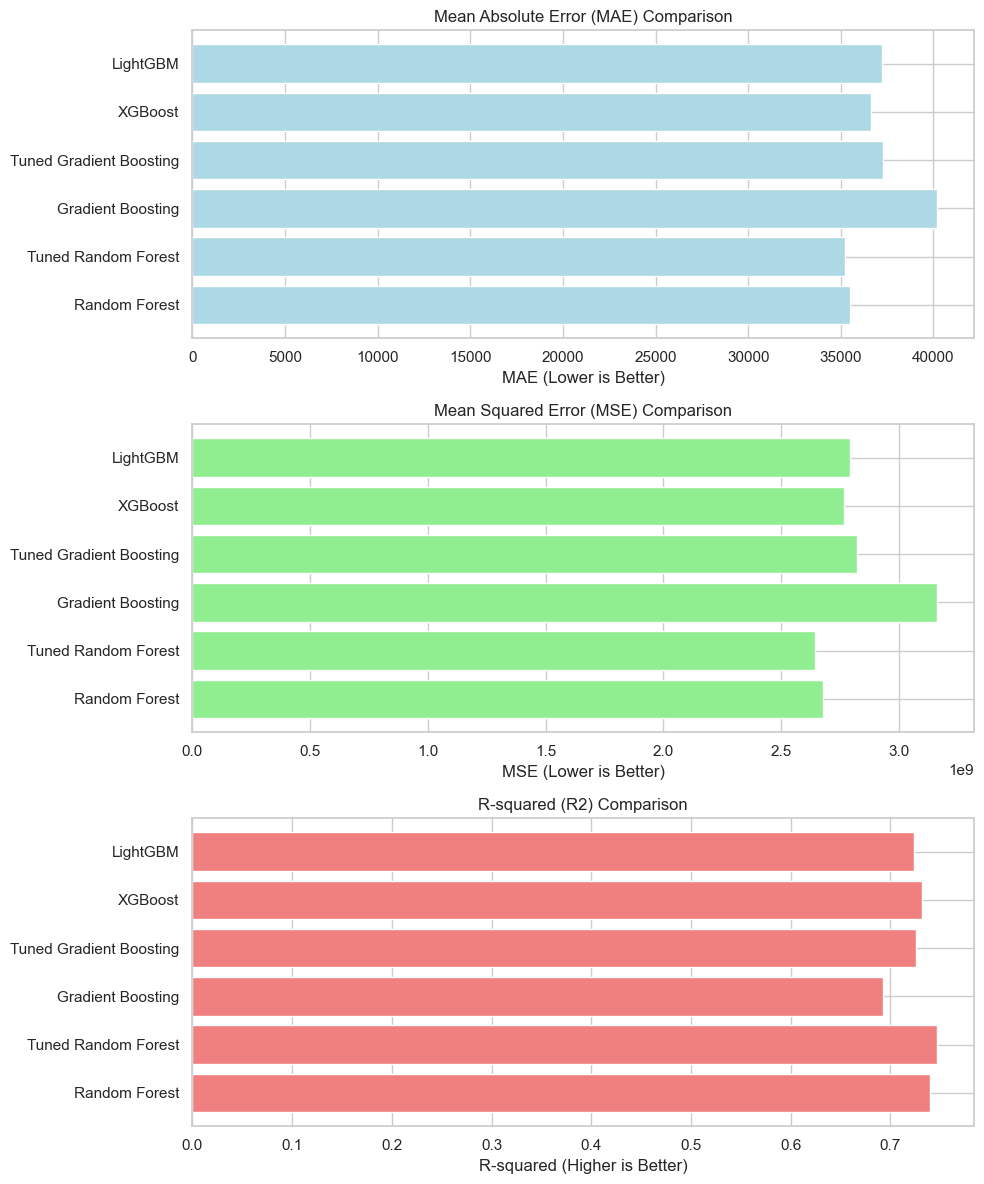

In [257]:
import matplotlib.pyplot as plt
import numpy as np

# Defining model names and their corresponding evaluation metrics
models = ['Random Forest', 'Tuned Random Forest', 'Gradient Boosting', 'Tuned Gradient Boosting', 'XGBoost', 'LightGBM']
mae = [35497.087, 35246.208, 40179.337, 37267.958, 36629.258, 37208.993]
mse = [2679066383.0, 2644028227.0, 3160905630.0, 2824140923.0, 2767932707.0, 2793409583.0]
r2 = [0.739872, 0.746661, 0.693085, 0.725784, 0.731422, 0.723894]

# Creating subplots to compare MAE, MSE, and R-squared visually
fig, axs = plt.subplots(3, 1, figsize=(10, 12))

# Plotting Mean Absolute Error (MAE)
axs[0].barh(models, mae, color='lightblue')
axs[0].set_title('Mean Absolute Error (MAE) Comparison')
axs[0].set_xlabel('MAE (Lower is Better)')

# Plotting Mean Squared Error (MSE)
axs[1].barh(models, mse, color='lightgreen')
axs[1].set_title('Mean Squared Error (MSE) Comparison')
axs[1].set_xlabel('MSE (Lower is Better)')

# Plotting R-squared (R2)
axs[2].barh(models, r2, color='lightcoral')
axs[2].set_title('R-squared (R2) Comparison')
axs[2].set_xlabel('R-squared (Higher is Better)')

plt.tight_layout()
plt.show()


### Stacking Model

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000185 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 15764, number of used features: 4
[LightGBM] [Info] Start training from score 196034.195826
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000153 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGB

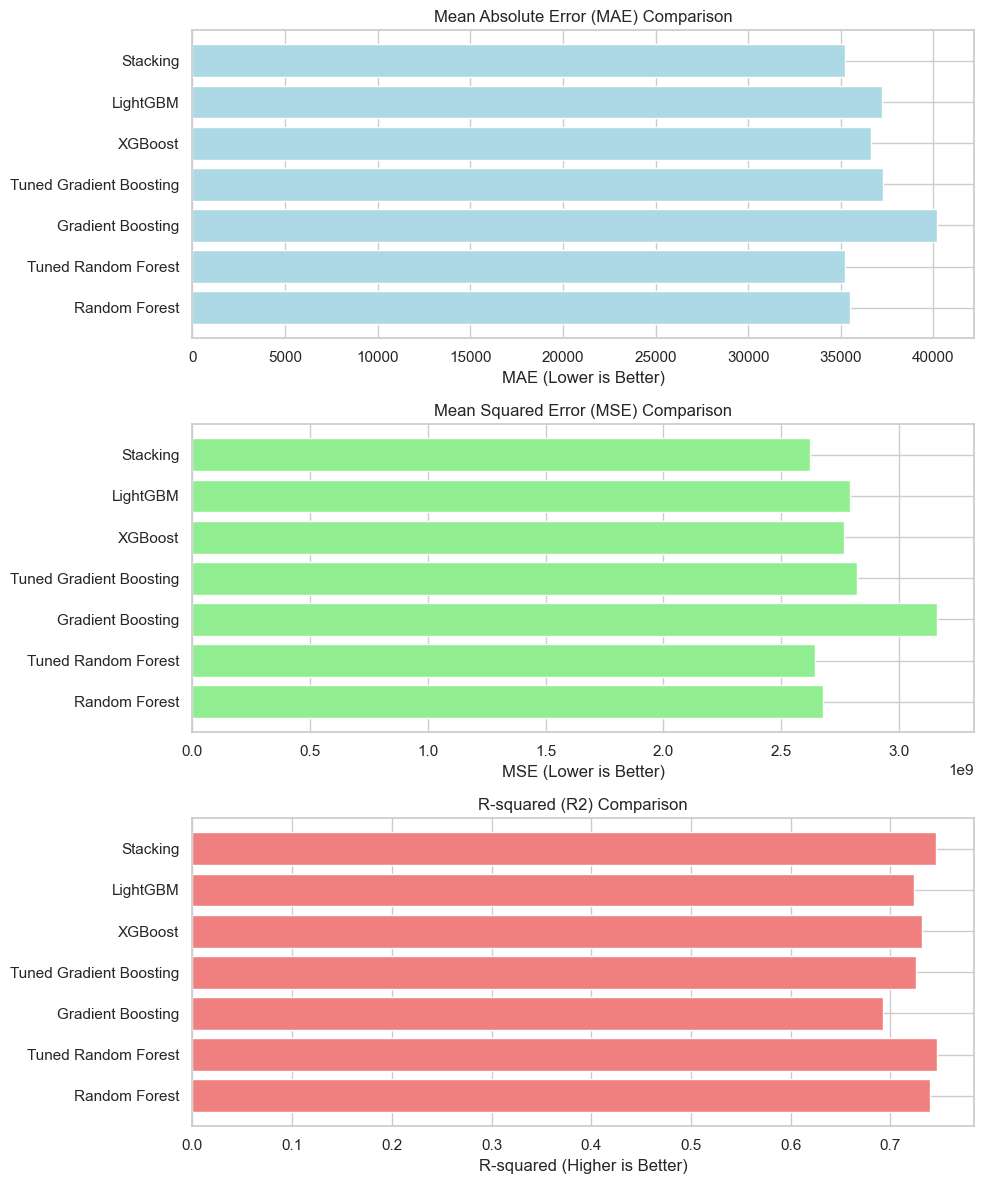

In [263]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the stacking model using Ridge as the final estimator
stacking_model = StackingRegressor(estimators=[
    ('rf', best_rf_model),
    ('gb', best_gb_model),
    ('xgb', xgb_model),
    ('lgbm', lgbm_model)],
    final_estimator=Ridge())

# Train the stacking model
stacking_model.fit(X_train, y_train)

# Make predictions using the stacking model
y_pred_stacking = stacking_model.predict(X_test)

# Evaluate the stacking model
mae_stacking = mean_absolute_error(y_test, y_pred_stacking)
mse_stacking = mean_squared_error(y_test, y_pred_stacking)
r2_stacking = r2_score(y_test, y_pred_stacking)

# Now let's add the stacking model metrics to the comparison
models.append('Stacking')
mae.append(mae_stacking)
mse.append(mse_stacking)
r2.append(r2_stacking)

# Visual comparison of all models including Stacking
fig, axs = plt.subplots(3, 1, figsize=(10, 12))

# Plotting Mean Absolute Error (MAE)
axs[0].barh(models, mae, color='lightblue')
axs[0].set_title('Mean Absolute Error (MAE) Comparison')
axs[0].set_xlabel('MAE (Lower is Better)')

# Plotting Mean Squared Error (MSE)
axs[1].barh(models, mse, color='lightgreen')
axs[1].set_title('Mean Squared Error (MSE) Comparison')
axs[1].set_xlabel('MSE (Lower is Better)')

# Plotting R-squared (R2)
axs[2].barh(models, r2, color='lightcoral')
axs[2].set_title('R-squared (R2) Comparison')
axs[2].set_xlabel('R-squared (Higher is Better)')

plt.tight_layout()
plt.show()


Mean Absolute Error (MAE):

    Lower MAE is better because it reflects smaller average prediction errors.
    Stacking is the best model with the lowest MAE, meaning it provides the most accurate predictions on average.
    Random Forest is the second-best model, with a slightly higher MAE than the Stacking model but still significantly better than the others.
    LightGBM and XGBoost follow closely behind Random Forest in performance.
    Gradient Boosting (both tuned and untuned) has the highest MAE values, indicating that these models produce larger average errors compared to the others.

MSE Interpretation:
Stacking:
        Stacking has the lowest MSE, making it the best model in terms of minimizing large prediction errors.
Tuned Random Forest:
        Tuned Random Forest is the second-best model, with an MSE slightly higher than Stacking but still performing better than the others.
XGBoost:
        XGBoost follows closely behind, with an MSE similar to Tuned Random Forest but higher.
LightGBM:
        LightGBM comes next, slightly worse than XGBoost and Tuned Random Forest, but still better than Gradient Boosting.
Gradient Boosting (both tuned and untuned):
        Gradient Boosting (both tuned and untuned) has the highest MSE values, indicating it struggles the most with large errors compared to the other models. The non-tuned version performs the worst.

Conclusion:

    Stacking performs the best, followed by Tuned Random Forest and XGBoost.
    Random Forest is decent, but Gradient Boosting (especially untuned) has the largest errors.

### Tuned the Stacking Model

In [269]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor

# Define tuned base models
rf_tuned = RandomForestRegressor(n_estimators=500, max_depth=30, random_state=42)
xgb_tuned = XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=7, random_state=42)
lgbm_tuned = LGBMRegressor(n_estimators=300, learning_rate=0.05, max_depth=7, random_state=42)

# Create the stacking model with different final estimators (Ridge, Lasso)
estimators = [('rf', rf_tuned), ('xgb', xgb_tuned), ('lgbm', lgbm_tuned)]
stacking_reg = StackingRegressor(estimators=estimators, final_estimator=Ridge())

# Define parameter grid for tuning the final estimator (Ridge and Lasso)
param_grid = {
    'final_estimator': [Ridge(), Lasso()],
    'final_estimator__alpha': [0.1, 1.0, 10.0],  # Regularization strength
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=stacking_reg, param_grid=param_grid, cv=3, scoring='r2')
grid_search.fit(X_train, y_train)

# Best model after tuning
best_stacking_model = grid_search.best_estimator_

# Make predictions using the best model
y_pred_best_stacking = best_stacking_model.predict(X_test)

# Evaluate the tuned stacking model
mae_best_stacking = mean_absolute_error(y_test, y_pred_best_stacking)
mse_best_stacking = mean_squared_error(y_test, y_pred_best_stacking)
r2_best_stacking = r2_score(y_test, y_pred_best_stacking)

print(f"MAE: {mae_best_stacking}, MSE: {mse_best_stacking}, R2: {r2_best_stacking}")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000260 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 10509, number of used features: 4
[LightGBM] [Info] Start training from score 195647.927015
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

### Saving the Model

In [272]:
import joblib

# Save the best stacking model
joblib.dump(best_stacking_model, 'best_stacking_model.pkl')


['best_stacking_model.pkl']

### Loading the Saved Model

In [ ]:
# Load the saved stacking model
loaded_model = joblib.load('best_stacking_model.pkl')

# Use the loaded model to make predictions
y_pred_loaded = loaded_model.predict(X_test)
